ref = https://www.youtube.com/watch?v=2XGSIlgUBDI

https://www.kaggle.com/freespirit08/time-series-for-beginners-with-arima

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\Gaurav\\Documents\\Work_Unyscape\\Arima_Time_series'

In [3]:
files = os.listdir(os.curdir)
files

['.git',
 '.gitattributes',
 '.ipynb_checkpoints',
 'AirPassengers.csv',
 'Arima_time_series.ipynb',
 'README.md',
 'true_vs_pred.png',
 'weatherAUS.csv']

In [4]:
df=pd.read_csv('AirPassengers.csv')

In [5]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [8]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [9]:
df['Month']=pd.to_datetime(df['Month'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [11]:
df.set_index('Month',inplace=True)

In [12]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<AxesSubplot:xlabel='Month'>

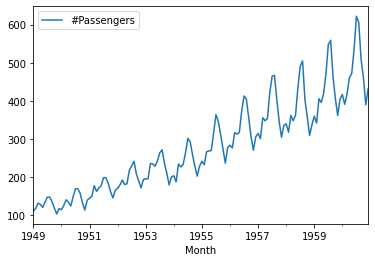

In [13]:
df.plot()

In [14]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [15]:
test_result=adfuller(df['#Passengers'])

In [16]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [17]:
adfuller_test(df['#Passengers'])

ADF Test Statistic : 0.8153688792060569
p-value : 0.9918802434376411
#Lags Used : 13
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Differencing

In [18]:
df["firstdiff"] = df["#Passengers"] - df["#Passengers"].shift(1)

In [19]:
df["firstdiff"]

Month
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: firstdiff, Length: 144, dtype: float64

In [20]:
df["seasonaldiff"] = df["#Passengers"] - df["#Passengers"].shift(12)

In [21]:
df.head()

,#Passengers,firstdiff,seasonaldiff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN


In [22]:
## Again test dickey fuller test
adfuller_test(df['seasonaldiff'].dropna())

ADF Test Statistic : -3.383020726492481
p-value : 0.011551493085514952
#Lags Used : 1
Number of Observations Used : 130
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

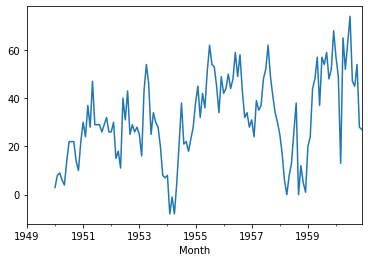

In [23]:
df['seasonaldiff'].plot()

# Auto Regressive Model

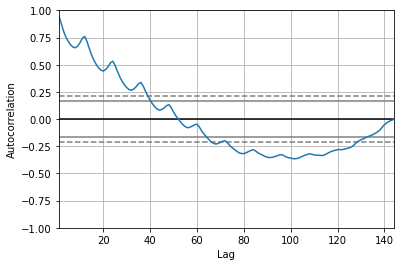

In [24]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['#Passengers'])
plt.show()

## Final Thoughts on Autocorrelation and Partial Autocorrelation Identification of an AR model is often best done with the PACF.

- For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
- Identification of an MA model is often best done with the ACF rather than the PACF.

 - For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model. 

p,d,q 

* p = AR model lags 
* d = differencing 
* q = MA lags

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

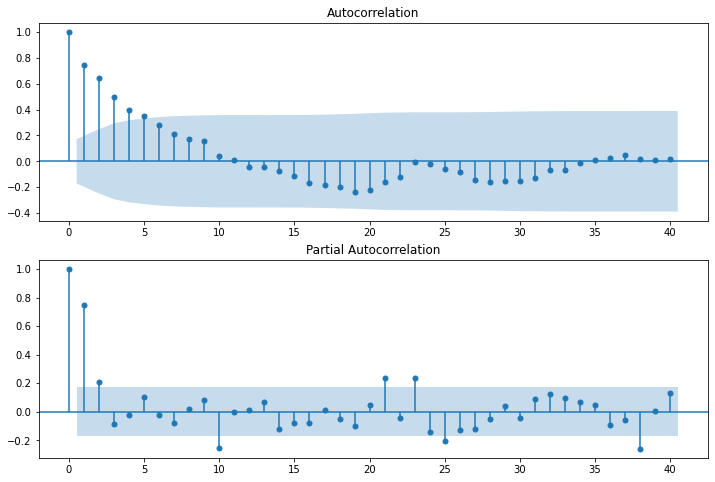

In [26]:
# iloc 13 because first 13 values are nan

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['seasonaldiff'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['seasonaldiff'].iloc[13:],lags=40,ax=ax2)

In [27]:
# For non-seasonal data
# (From PACF) p = 2, (From ACF) q= 2, d= 1
from statsmodels.tsa.arima.model import ARIMA

In [28]:
# order = p,d,q
model=ARIMA(df['#Passengers'],order=(2,1,2))
model_fit=model.fit()

C:\Users\Gaurav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Gaurav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Gaurav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Gaurav\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [29]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Mon, 09 Aug 2021   AIC                           1353.347
Time:                        13:02:08   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.057      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.418      0.000      -0.989      -0.921
ma.L1         -1.8432      0.125    -14.746      0.000      -2.088      -1.598
ma.L2          0.9953      0.135      7.349      0.000       0.730       1.261
sigma2       665.9512    114.345      5.824      0.000     441.839     890.063
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 1.84
Prob(Q):                              0.59   Prob(JB):                         0.40
Heteroskedasticity (H):               7.38   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

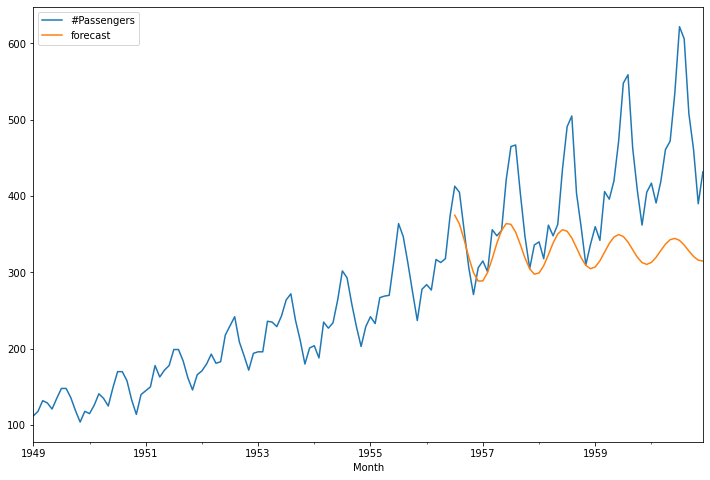

In [30]:
df['forecast']=model_fit.predict(start=90,end=144,dynamic=True)
df[['#Passengers','forecast']].plot(figsize=(12,8))

# Seasonal ARIMA

In [31]:
model=sm.tsa.statespace.SARIMAX(df['#Passengers'],order=(2, 1, 2),seasonal_order=(2,1,2,12))
results=model.fit()

C:\Users\Gaurav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Gaurav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Gaurav\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='Month'>

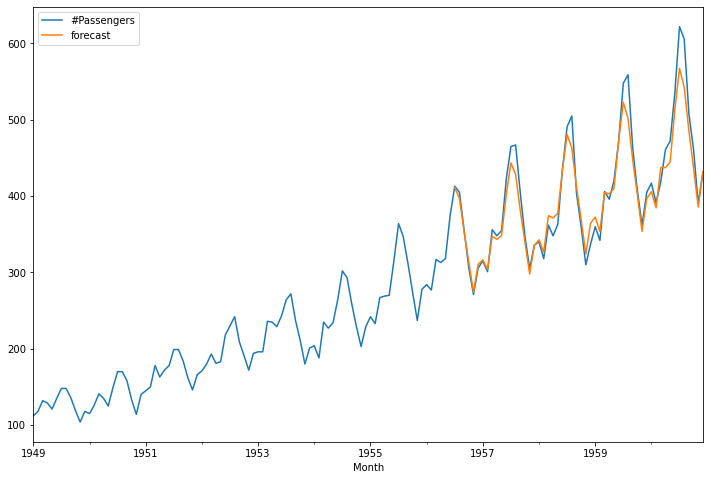

In [32]:
df['forecast']=results.predict(start=90,end=144,dynamic=True)
df[['#Passengers','forecast']].plot(figsize=(12,8))

In [33]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [34]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [35]:
future_datest_df.tail()

,#Passengers,firstdiff,seasonaldiff,forecast
1962-07-01,NaN,NaN,NaN,NaN
1962-08-01,NaN,NaN,NaN,NaN
1962-09-01,NaN,NaN,NaN,NaN
1962-10-01,NaN,NaN,NaN,NaN
1962-11-01,NaN,NaN,NaN,NaN


In [36]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

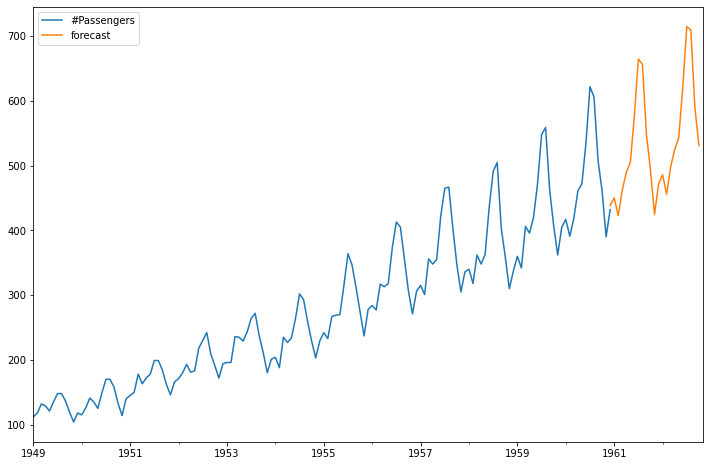

In [37]:
future_df['forecast'] = results.predict(start = 143, end = 165, dynamic= True)  
future_df[['#Passengers', 'forecast']].plot(figsize=(12, 8))